### Description: This program uses the Bollinger bands to determine when to buy and sell stocks

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

plt.style.use('fivethirtyeight')

In [21]:
df = yf.download(tickers='AAPL', start='2022-01-01', end='2023-03-01')
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-22,148.869995,149.949997,147.160004,148.910004,148.910004,51011300
2023-02-23,150.089996,150.339996,147.240005,149.399994,149.399994,48394200
2023-02-24,147.110001,147.190002,145.720001,146.710007,146.710007,55469600
2023-02-27,147.710007,149.169998,147.449997,147.919998,147.919998,44998500
2023-02-28,147.050003,149.080002,146.830002,147.410004,147.410004,50547000


In [28]:
# Define a function to create and get Bollinger Bands

def bollinger_bands(data, window: int = 20):
    rolling_mean = data['Close'].rolling(window).mean()
    rolling_std = data['Close'].rolling(window).std()
    data['UpperBand'] = rolling_mean + (rolling_std * 2)
    data['LowerBand'] = rolling_mean - (rolling_std * 2)
    
    return data

In [35]:
# Define a function to create and get the Relative Strength Index(RSI)

def rsi(data, window: int = 13):
    
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    data['RSI'] = rsi
    data['Overbought'] = 70
    data['Oversold'] = 30
    
    return data

Buy when the close price goes below the Lower Band and RSI is less than 30 and you currently don't have a position. 
Sell when the close price goes above the Upper Band and RSI is greater then 70 and you currently have a position

In [36]:
# Define a function to create and get the trading strategy

def strategy(data):
    position = 0
    buy_price = []
    sell_price = []
    
    for i in range(len(data)):
        if data['Close'][i] < data['LowerBand'][i] and data['RSI'][i] < data['Oversold'][i] and position == 0:
            position = 1
            buy_price.append(data['Close'][i])
            sell_price.append(np.nan)
        elif data['Close'][i] > data['UpperBand'][i] and data['RSI'][i] > data['Overbought'][i] and position == 1:
            position = 0
            buy_price.append(np.nan)
            sell_price.append(data['Close'][i])
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            
    return (buy_price, sell_price)

In [37]:
# Add the Bollinger Bands to the DataFrame
df = bollinger_bands(df)

In [38]:
# Add the RSI to the DataFrame
df = rsi(df)

In [39]:
# Implement the trading strategy
buy_price, sell_price = strategy(df)
df['Buy'] = buy_price
df['Sell'] = sell_price

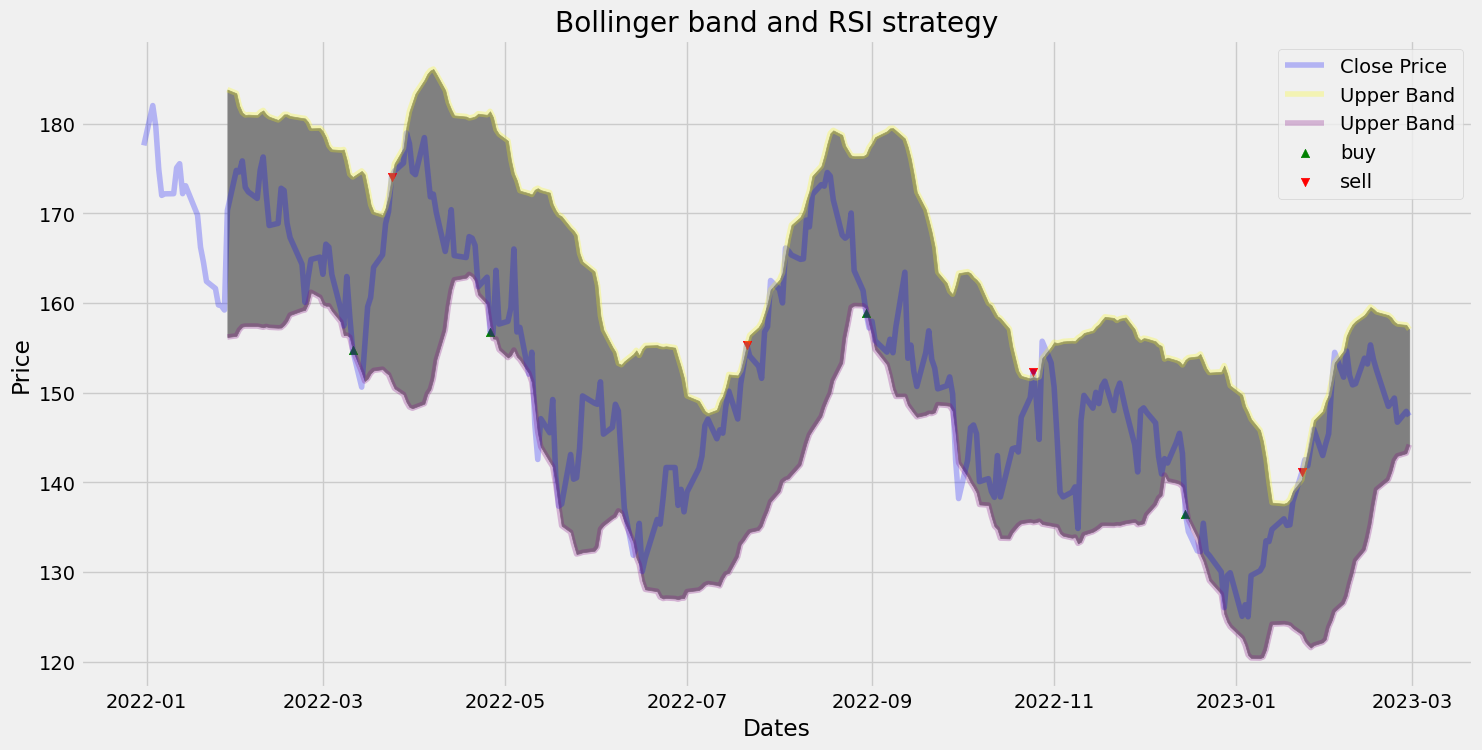

In [40]:
# Plot the close price, Bollinger Bands and the trading signals(buy and sell signals)
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Bollinger band and RSI strategy')
plt.ylabel('Price')
plt.xlabel('Dates')
ax.plot(df['Close'], label='Close Price', alpha=0.25, color='blue')
ax.plot(df['UpperBand'], label='Upper Band', alpha=0.25, color='yellow')
ax.plot(df['LowerBand'], label='Upper Band', alpha=0.25, color='purple')
ax.fill_between(df.index, df['UpperBand'], df['LowerBand'], color='grey')
ax.scatter(df.index, df['Buy'], label='buy', alpha=1, marker='^', color='green')
ax.scatter(df.index, df['Sell'], label='sell', alpha=1, marker='v', color='red')
plt.legend()
plt.show()